## Summary

Edelweiss published a paper detailing the resolution of their detectors and also the width of their electron and nuclear recoil bands (https://doi.org/10.1016/j.nima.2004.04.218).  

I suggest we use their model for detector GGA3, for which all of the constants needed for their parametrization of the measured band widths are given.

This notebook (1) defines the resoultion functions used by Edelweiss and (2) reproduces Edelweiss plots to convince the reader this interpretation is correct.

## Band Widths
Edelweiss parametrizes their band widths for all detectors (see eq'ns 9, 10, and 11 from the above paper).  

$$\sigma_{Q\gamma}(E_R) = \frac{1 + V/3}{E_R}\sqrt{\sigma_I^2 + \sigma_H^2}$$

$$\sigma_{Qn}(E_R) = \sqrt{C^2 + \frac{1}{E^2_R} \left( \left(1+\frac{V}{3}\langle Q_n\rangle\right)^2\sigma_I^2 + \left( 1+\frac{V}{3}\right)^2\langle Q_n\rangle^2\sigma_H^2\right)} $$

where $\langle Q_n \rangle$, $\sigma_I^2$, and $\sigma_H^2$ are all functions of the true recoil energy $E_R$. The yield $\langle Q_n \rangle = 0.16 E_R^{0.18}$.  The terms $\sigma_I^2$ and $\sigma_H^2$ should be read as "the heat/ionization resolution for an energy deposit of $E_R$."  For the electron recoil band and $\sigma_{Q\gamma}$, the arguments for$\sigma_I^2$ $\sigma_H^2$ are $E_R$ since for electron recoils, $E_I = E_R$ and $E_H = E_R$.  For nuclear recoils the heat and ionization energy are not identical to the energy $E_R$ and are defined in the section below.

It is useful to express the above resolution functions purely in terms of the recoil energy $E_R$:

$$\sigma_{Q\gamma}(E_R) = \frac{1 + V/3}{E_R}\sqrt{(\sigma_I^0)^2 + (a'_I E_R)^2 + (\sigma_H^0)^2 + (a'_H E_R)^2}$$

$$\sigma_{Qn}(E_R) = \left\{ C^2 + \frac{1}{E^2_R} \left( \left(1+\frac{V}{3} 0.16 E_R^{0.18}\right)^2 \left((\sigma_I^0)^2 + (a'_I 0.16 E_R^{0.18}\times E_R)^2\right) \\
+ \left( 1+\frac{V}{3}\right)^2 (0.16 E_R^{0.18})^2\left((\sigma_H^0)^2 + (a'_H E_H)^2\right)\right)\right\}^{1/2} $$



### Fitting constants for resolutions $\sigma_I(E_I)$, $\sigma_H(E_H)$
$$
\sigma_I(E_I) = \sqrt{(\sigma_I^0)^2 + (a'_I E_I)^2} \\
\sigma_H(E_H) = \sqrt{(\sigma_H^0)^2 + (a'_H E_H)^2}
$$

The heat and ionization resolutions $\sigma_I^2$ and $\sigma_H^2$ each have two fitting constants, a constant and a quadratic-in-energy term.  Both resolutions are defined from the widths of gamma peaks - in other words, electron recoils are used to define the resolutions.  For electron recoils, $E_R = E_I = E_H$ and the true recoil energy of the gamma peaks should be used for any fitting of the resoultion functions.

The constant terms are defined from the zero-energy resolution: $\sigma_I^0 = \sqrt{(\sigma_{center}^0)^2 + (\sigma_{guard}^0)^2}$.  The quantities $\sigma_{center}^0$, $\sigma_{guard}^0$, and $\sigma_H^0$ can be found from Table 2, which gives the FWHM at 0 keV of the center and guard ionization signals and heat signal.

The quantity $a_I$ is fixed by requiring that $FWHM_I(122 keV) = \sqrt{(FWHM_I^0)^2 + (a_I*122 keV)^2}$; the FWHM of the ionization signal at 122 keV is also given in Table 2.  This is the quantity reported in the paper.  It is important to note that the $a_I$ and $a_H$ reported in the paper are appropriate for calculating FWHM quantities, not standard deviation quantities.  To calculate standard deviations it is necessary to convert:

$$a'_I = \frac{a_I}{2*\sqrt{2*\log{2}}}$$

The quantity $a_H$ (and $a'_H$) would be determined like $a_I$ above, but for 252Cf calibrations (and also 60Co calibrations), they found they needed to make $a_H$ larger to account for the width of the electron-recoil band.  They hypothesize that this is due to position-dependence of the resolution.

### Energy scale for resolutions $\sigma_I(E_I)$, $\sigma_H(E_H)$

The resolutions are calculated from the widths of gamma peaks (in other words, from electron recoils).  For electron recoils, the ionization and heat energies are exactly the recoil energy, $E_I = E_H = E_R$.

For nuclear recoils, the appropriate quantity to give to the resolution function is the ionization energy $E_I$ produced by a nuclear recoil of energy $E_R$ and the heat energy produced by the recoil energy $E_R$.  These are as follows:

$$
E_I = \langle Q_n \rangle(E_R)\times E_R \\
E_H = \frac{1+\frac{V}{3~eV} \langle Q_n \rangle(E_R)}{1+\frac{V}{3~eV}} \times E_R
$$

### Fitting constant $C$
The quantity C is also determined from data; C is varied to fit the width of the neutron band from 252Cf calibrations and is typically 0.04. 

For detector GGA3, the voltage is -4 V, a_H is 0.035, and C is 0.04.  $\sigma_I^0$ is 0.843 keVee, $\sigma_H^0$ is 0.171 keVee, and $a_I$ is 0.0083.  The voltage, $a_H$, and C are given directly in the paper; the other quantities are calculated from Table 2.

== Cross-check on $a_H$: Heat resolution of GGAl10

== Cross-check: ER and NR bands of GGA1

In [2]:
import numpy as np
from functools import partial
import pandas as pd
#import matplotlib as mpl
#mpl.rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
%matplotlib inline 
#import mpld3
#mpld3.enable_notebook()

import sys
sys.path.append('../python/')
from EdwRes import *

In [3]:
get_heatRes_func(0.843*2.355, 3.1)
heatRes_GGAl10 = get_heatRes_func(0.4, 3.5)
heatRes_GGAl10_guard = get_heatRes_func(0.655, 4.0)

In [4]:
heatRes_GGAl10(50)

0.6285417605602965

In [5]:
heatRes_data = pd.read_csv("resolution_GeAl10_dataPoints_correctedEnergies.txt", skiprows=1)
print (heatRes_data.head(10))

   Energy    FWHM   error
0  122.10  3.9992  0.4938
1   46.52  1.8558  0.2918
2   10.37  0.6831  0.0757
3    0.00  0.6551  0.0814


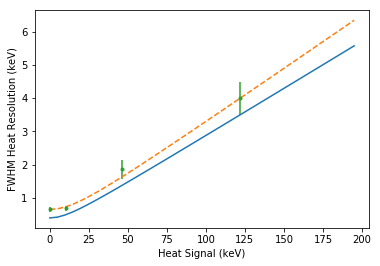

In [6]:
# plot the heat resolution, reproduce fig 2d from 2004 NIMA Edelweiss paper
E_vec = np.arange(0,200,5)
#table, = plt.plot(E_vec, 2.355*heatRes_GGAl10(E_vec), label='Resolution (table)')
#plot, = plt.plot(E_vec, 2.355*heatRes_GGAl10_guard(E_vec), linestyle='--', label='Resolution (plot)')
table, = plt.plot(E_vec, 2.355*heatRes_GGAl10(E_vec), label='Resolution (table)')
plot, = plt.plot(E_vec, 2.355*heatRes_GGAl10_guard(E_vec), linestyle='--', label='Resolution (plot)')
data = plt.errorbar((heatRes_data.Energy).tolist(), (heatRes_data.FWHM).tolist(), yerr=(heatRes_data.error).tolist(), fmt='.', label='Guard-event resolution')
plt.xlabel("Heat Signal (keV)")
plt.ylabel("FWHM Heat Resolution (keV)")
#plt.legend(handles=[table, plot, data])
plt.show()

         0         1        2         3
0  13.6688  0.150150  13.3000  0.150176
1  13.8758  0.148032  13.5434  0.147970
2  14.1016  0.145915  13.7869  0.145765
3  14.3443  0.143799  14.0303  0.143559
4  14.5870  0.141683  14.2738  0.141354
ion resolution at 0keV, 122keV:
1.9850950131774576 3.1002369015013413
heat resolution at 0keV, 122keV:
0.400030567935657 2.700206333565685


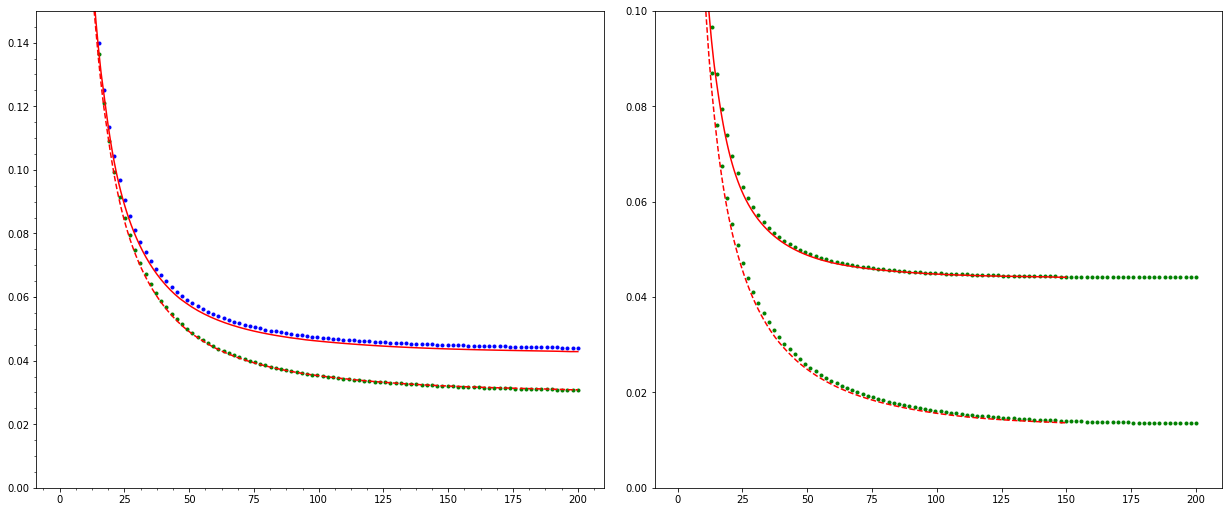

In [7]:
data_GGA3 = pd.read_csv("edelweiss_ER_band_GGA3_curveData.txt", skiprows=1, header=None, delim_whitespace=True)
print (data_GGA3.head(5))
list(data_GGA3.columns.values)

dataNR_GGA3 = pd.read_csv("edelweiss_NR_band_GGA3_curveData.txt", skiprows=1, header=None, delim_whitespace=True)

# expect aH to be 0.020 based on fig. 7
# but my calculations say 0.022?
# increasing heat_0keV decreases the slope btwn 20 and 50 keV
# increasing aH increases the yield in the tail
# increasing ion_122keV even a little increases the yield in the tail
# completely insensitive to heat_122keV
# voltage changes shift curves to the right and increases yield in tail
# increasing ion_center_0keV shifts graph to right, tilts it down: tails become not flat
# increasing ion_guard_0keV has same effect as ion_center_0keV
ion_center_0keV = 1.3
ion_guard_0keV = 1.5
heat_0keV = 0.4
ion_122keV = 3.1 #3.3 #3.1
heat_122keV = 2.7
V = 4
ion_res = get_ionRes_func(1.3, 1.5, ion_122keV)
print("ion resolution at 0keV, 122keV:")
print(ion_res(0)*2.355, ion_res(122)*2.355)

heat_res = get_heatRes_func(heat_0keV, heat_122keV)
print("heat resolution at 0keV, 122keV:")
print(heat_res(0)*2.355, heat_res(122)*2.355)
# 0.0157 is the published value
aH = 0.0164 #0.0157
sig_gamma_GGA3 = get_sig_gamma_func(1.3, 1.5, ion_122keV, heat_0keV, heat_122keV, V)
sig_gamma_GGA3_wide = get_sig_gamma_func(1.3, 1.5, ion_122keV, heat_0keV, heat_122keV, V, aH)

# we'll plot the ER and NR band widths
fig,axes = plt.subplots(1,2,figsize=(17.0,7.0), constrained_layout=True)

# plot the electron recoil widths
E_keV_arr = np.linspace(1,200,100)
ax1 = axes[0]
ax2 = axes[1]
ax1.plot(E_keV_arr, sig_gamma_GGA3(E_keV_arr),'g.')
ax1.plot(E_keV_arr, sig_gamma_GGA3_wide(E_keV_arr),'b.')

#def get_sig_nuc_func(FWHM_center, FWHM_guard, FWHM122_ion, FWHM0_heat, FWHM122_heat, V, aH=None):
# since the resolutions are a function of the electron-equivalent energy, need to convert
# see "edelweiss_energy_scale.pdf" in this directory for explanation:
E_keVee_arr = np.multiply(E_keV_arr, (1+(V/3.0)*Q_avg(E_keV_arr))/(1+(V/3.0)))
#print (E_keV_arr)
#print ((1+(V/3.0)*Q_avg(E_keV_arr))/(1+(V/3.0)))
#print (E_keVee_arr)
# not sure what I'm using for the aH value, here?
# aH = 4?  aH = 0.4?  Is this C?
# get_sig_nuc_func(FWHM_center, FWHM_guard, FWHM122_ion, FWHM0_heat, FWHM122_heat, V, aH=None)
sig_nr_GGA3 = get_sig_nuc_func(1.3, 1.5, ion_122keV, heat_0keV, heat_122keV, V, aH)
ax2.plot(E_keV_arr, sig_nr_GGA3(E_keV_arr),'g.')

#get_sig_nuc_func_fit(FWHM_center, FWHM_guard, FWHM122_ion, FWHM0_heat, FWHM122_heat, V, aH=None, C = None)
sig_nr_GGA3_wide = get_sig_nuc_func(ion_center_0keV, ion_guard_0keV, ion_122keV, heat_0keV, heat_122keV, V, aH, C = 0.042)
ax2.plot(E_keV_arr, sig_nr_GGA3_wide(E_keV_arr),'g.')

# 90% is +/- 1.645*sigma
# FWHM is 2.355*sigma

# plot the data-theifed bands
ax1.plot(data_GGA3[0], data_GGA3[1], 'r-')
ax1.plot(data_GGA3[2], data_GGA3[3], 'r--')

ax2.plot(dataNR_GGA3[0], dataNR_GGA3[1], 'r-')
ax2.plot(dataNR_GGA3[2], dataNR_GGA3[3], 'r--')
ax2.set_ylim(0,0.1)

ax1.set_ylim(0,0.15)
ax1.minorticks_on()
plt.show()

In [8]:
# get_sig_gamma_func(FWHM_center, FWHM_guard, FWHM122_ion, FWHM0_heat, FWHM122_heat, V, aH_stretch)
# increasing FWHM0_heat makes the fit better near 20 keV, e.g. from 1.3 to 2.3 for GGA1
# increasing V makes the 20 keV region fit better but makes the high-energy region overshoot the data
# increasing FWHM122_heat increases the width at higher energies and has no impact on lower energies
# increasing aH_stretch increases the width at higher energies and has no impact on lower energies
# if I use the parameters for GeAl6 it seems to fit the bands much better, unless the actual voltage for GeAl6 is used
#sig_gamma_GGA1 = get_sig_gamma_func(1.3, 1.3, 2.8, 1.3, 3.5, 4, 1)
sig_gamma_GGA1 = get_sig_gamma_func(2, 1.4, 2.8, 2.2, 3.5, 6.34, 1.3)
sig_gamma_GGA1_a = get_sig_gamma_func(1.3, 1.3, 2.8, 1.3, 3.5, 4, 1.5)

In [9]:
band_data = pd.read_csv("edelweiss_bands_GGA1.csv")
print (band_data.head(5))

# path 0: 68.75 keV inelastic scattering
# path 1: average NR line
# path 2: 13.26 keV inelastic
# path 3: ionization threshold
# path 4: lower nuclear recoil band
# path 5: upper nuclear recoil band
# path 6: upper and lower electron recoil band
band_data_svg = pd.read_csv("edelweiss_band_GGA1_curveData.txt", skiprows=1, header=None, delim_whitespace=True)
print (band_data_svg.head(5))
list(band_data_svg.columns.values)

       x   Curve1   curve2   curve3   curve4
0  1.667 -6.44581 -0.08957  1.49300 -0.64478
1  1.802 -6.06069 -0.08789  1.44296 -0.62392
2  1.804 -6.05415 -0.08786  1.46798 -0.62356
3  1.938 -5.68168 -0.08613  1.41795 -0.60321
4  2.075 -5.31531 -0.08430  1.39293 -0.58303


OSError: File b'edelweiss_band_GGA1_curveData.txt' does not exist

In [ ]:
# 90% is +/- 1.645*sigma
# FWHM is 2.355*sigma

E_keV_arr = np.linspace(1,200,100)

# plot the central nuclear recoil line
plt.plot(band_data_svg[2], band_data_svg[3], 'r', linewidth=1)
#plt.plot(E_keV_arr, Q_avg(E_keV_arr),'r--')

# plot the data-theifed bands
#plt.plot(band_data.x[band_data.x>7.82], band_data.Curve1[band_data.x>7.82], 'b.')
#plt.plot(band_data.x, band_data.curve2, 'b.')
plt.plot(band_data_svg[12][band_data_svg[13]>1], band_data_svg[13][band_data_svg[13]>1], 'b', linewidth=1)
plt.plot(band_data_svg[12][band_data_svg[13]<1], band_data_svg[13][band_data_svg[13]<1], 'b', linewidth=1)

#plt.plot(band_data.x, band_data.curve3, 'r.')
#plt.plot(band_data.x, band_data.curve4, 'r.')
plt.plot(band_data_svg[8], band_data_svg[9], 'r', linewidth=1)
plt.plot(band_data_svg[10], band_data_svg[11], 'r', linewidth=1)

# plot the ionization bands
plt.plot(E_keV_arr, 1+1.645*sig_gamma_GGA1(E_keV_arr), 'c-.', linewidth=2)
plt.plot(E_keV_arr, 1-1.645*sig_gamma_GGA1(E_keV_arr), 'c-')
plt.plot(E_keV_arr, 1+1.645*sig_gamma_GGA1_a(E_keV_arr), 'c--')

plt.ylim(0,1.5)
plt.minorticks_on()
#plt.grid(True)
plt.show()